 
# NETWORK BIOLOGY 
  
## Assignment 1

####  Submitted By: 
#####  Divyanshu Srivastava (MT16125)


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

##### Question 1 - Watts and Strogatz small world network model

In [73]:
# Regular graph initialization
nodes = 1000
k = 10

adj = np.zeros([nodes, nodes])

for i in range(0, nodes):
    for j in range(1, k/2 + 1):
        adj[i, (i+j) % nodes] = 1
        adj[(i+j) % nodes, i] = 1  

edgelist = np.zeros([nodes*k/2, 2])
iterator = 0

for i in range(0, nodes-1):
    for j in range(i+1, nodes):
        if adj[i, j] == 1:
            edgelist[iterator, 0] = i
            edgelist[iterator, 1] = j
            iterator += 1

G = nx.Graph()
G.add_edges_from(edgelist)
# print adj
# print sum(adj)
# G = nx.random_regular_graph(k, nodes)
G_copy = G

# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# #nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

In [74]:
# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

prob = list()
prob.append(0.0001)
while prob[-1] < 1:
    prob.append(prob[-1]*2.303)
prob = prob[0:-1]

L = np.zeros([1, len(prob)+1])[0]
C = np.zeros([1, len(prob)+1])[0]

G = G_copy

L[0] = nx.average_shortest_path_length(G)
C[0] = nx.average_clustering(G)


count = 5

L_temp = np.zeros([1, count])[0]
C_temp = np.zeros([1, count])[0]

iterator = 1
for p in prob:
    print p
    for c in range(count):
        G = G_copy
        for n in G.nodes():
            for e in G.edges(n):
                if np.random.rand() < p:
                    ## perform rewiring
                    neighbours = np.array(G.edges(n))[:,1]
                    new_node = np.random.randint(1, high=nodes+1)
                    while new_node in neighbours:
                        new_node = np.random.randint(1, high=nodes+1)
                    G.remove_edge(e[0], e[1])
                    G.add_edge(e[0], new_node)
                    if not nx.is_connected(G):
                        G.remove_edge(e[0], new_node)
                        G.add_edge(e[0], e[1])
        L_temp[c] = nx.average_shortest_path_length(G)
        C_temp[c] = nx.average_clustering(G)

    L[iterator] = np.average(L_temp)
    C[iterator] = np.average(C_temp)
    iterator += 1


## TODO: Capture graph disconnected condition on rewiring

# L /= L[0]
# C /= C[0]

0.0001
0.0002303
0.0005303809
0.0012214672127
0.00281303899085
0.00647842879592
0.014919821517
0.0343603489537
0.0791318836403
0.182240728024
0.419700396638
0.966570013458


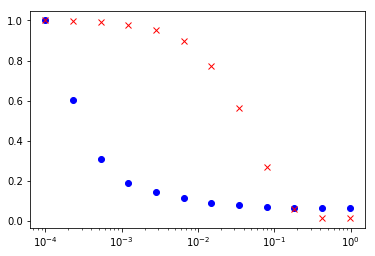

In [78]:
ln = L[0:12]
ln = ln/L[0]
cn = C[0:12]
cn = cn/C[0]

plt.semilogx(prob, ln, 'bo', prob, cn, 'rx')

plt.show()

#### Question 2 - Barabasi Albert Model


Average clustering coefficient
0.824783561063
Characteristic Path length
2.36371142285


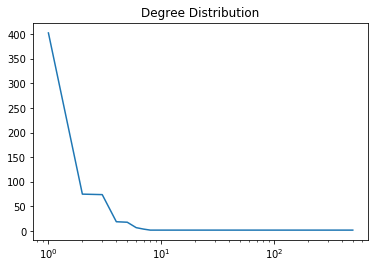

In [14]:
max_nodes = 500

G = nx.Graph([[0, 1]])

for x in range(2, max_nodes):
#     print x
    
    p = np.float32(np.asarray(G.degree().values()))
    p = p/sum(G.degree().values())
    
    t = True
    while t:
        try:
            n = np.random.rand()
            m = max(filter(lambda x: x< n, p))
            t = False
        except ValueError:
            continue

#     p = p*200
    G.add_node(x)
    try:
       
        
        G.add_edge(np.where(max(filter(lambda x: x < n, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass
    try:
        G.add_edge(np.where(max(filter(lambda x: x < m, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass
        


print "Average clustering coefficient"
print nx.average_clustering(G)
print "Characteristic Path length"
print nx.average_shortest_path_length(G)

plt.semilogx(G.degree().values())
plt.title('Degree Distribution')
plt.show()

##### Tweaking the probability

Average clustering coefficient
0.10866700466
Characteristic Path length
3.43397194389


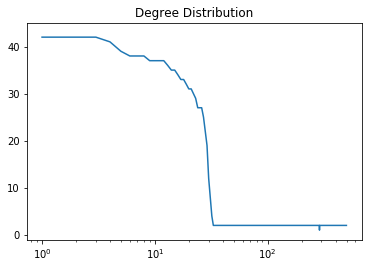

In [19]:
max_nodes = 500

G = nx.Graph([[0, 1]])

for x in range(2, max_nodes):
#     print x
    
    p = np.float32(np.asarray(G.degree().values()))
    p = np.square(p)
    p = p/sum(G.degree().values())
    
    t = True
    while t:
        try:
            n = np.random.rand()
            m = max(filter(lambda x: x< n, p))
            t = False
        except ValueError:
            continue

#     p = p*200
    G.add_node(x)
    try:
       
        
        G.add_edge(np.where(max(filter(lambda x: x < n, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass
    try:
        G.add_edge(np.where(max(filter(lambda x: x < m, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass
        


print "Average clustering coefficient"
print nx.average_clustering(G)
print "Characteristic Path length"
print nx.average_shortest_path_length(G)

plt.semilogx(G.degree().values())
plt.title('Degree Distribution')
plt.show()

#### Question 3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


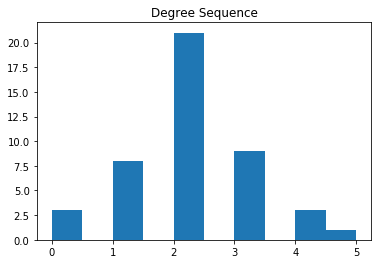

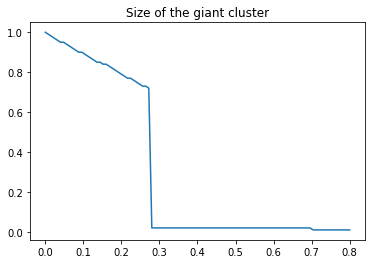

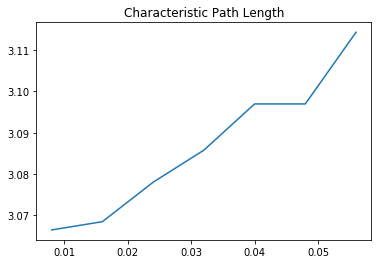

In [67]:
nodes = 100
degree = 5
G = nx.random_regular_graph(degree, nodes)

X = np.linspace(0, 0.8, 101)
L = np.zeros_like(X)
S = np.zeros_like(X)

nodes_to_del = 0.01*G.number_of_nodes()

for x in X:
    i = np.where(X == x)[0][0]
#     print i
#     G_copy = G
    if x != 0:        
        G.remove_nodes_from(np.random.randint(G.number_of_nodes(), size=nodes_to_del))
    try:
        L[i] = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        L[i] = L[i-1]
    S[i] = nx.number_of_nodes(max(nx.connected_component_subgraphs(G)))
#     print G.number_of_nodes()

plt.hist(G.degree().values())
plt.title('Degree Sequence')
plt.show()

plt.plot(X, S/nodes)
plt.title('Size of the giant cluster')
plt.show()

plt.plot(X[1:8], L[1:8])
plt.title('Characteristic Path Length')
plt.show()

#### Random deletions in exp and scale-free graphs

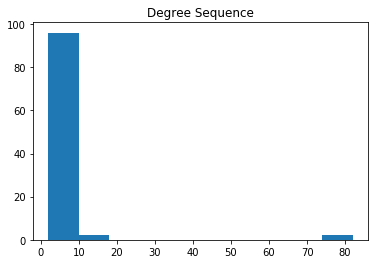

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


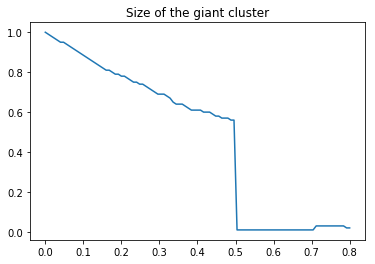

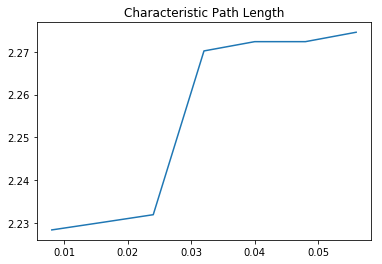

In [86]:
max_nodes = 100
G = nx.Graph([[0, 1]])
for x in range(2, max_nodes):
    p = np.float32(np.asarray(G.degree().values()))
    p = p/sum(G.degree().values())
    t = True
    while t:
        try:
            n = np.random.rand()
            m = max(filter(lambda x: x< n, p))
            t = False
        except ValueError:
            continue
    G.add_node(x)
    try:
        G.add_edge(np.where(max(filter(lambda x: x < n, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass
    try:
        G.add_edge(np.where(max(filter(lambda x: x < m, p)) == p)[0][0], x)
    except IndexError:
        pass
    except ValueError:
        pass

plt.hist(G.degree().values())
plt.title('Degree Sequence')
plt.show()

X = np.linspace(0, 0.8, 101)


## scale free
L_sf = np.zeros_like(X)
S_sf = np.zeros_like(X)

nodes_to_del = 0.01*G.number_of_nodes()

for x in X:
    i = np.where(X == x)[0][0]
#     print i
#     G_copy = G
    if x != 0:        
        G.remove_nodes_from(np.random.randint(G.number_of_nodes(), size=nodes_to_del))
    try:
        L_sf[i] = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        L_sf[i] = L_sf[i-1]
    S_sf[i] = nx.number_of_nodes(max(nx.connected_component_subgraphs(G)))
#     print G.number_of_nodes()

plt.plot(X, S_sf/max_nodes)
plt.title('Size of the giant cluster')
plt.show()

plt.plot(X[1:8], L_sf[1:8])
plt.title('Characteristic Path Length')
plt.show()

In [64]:
G = nx.random_regular_graph(degree, nodes)
nx.number_of_nodes(min(nx.connected_component_subgraphs(G)))

100